In [12]:
import numpy as np
import matplotlib.pyplot as plt
from utils.inference import ecg_noise_quantification


"#### 🔗 Pretrained Model
You can download the pretrained latent diffusion model from 🤗 Hugging Face:

👉 [Download pretrained model](https://huggingface.co/Taeseong-Han/ECGNoiseQuantification/blob/main/pretrained_ldm.pth)

In [10]:
checkpoint_path = "./output/pretrained_ldm.pth"
ecg = np.load("./data/database/ecg_example.npz")['signal']

output = ecg_noise_quantification(
    ecg=ecg,
    sampling_freq=500,
    checkpoint_path=checkpoint_path,
)

print(ecg.shape)
print(output.cleaned_image.shape)  # (leads, segments, H, W)
print(output.original_image.shape)  # (leads, segments, H, W)
print(output.psnr.shape)  # (leads, segments)

(5000,)
(1, 1, 32, 256)
(1, 1, 32, 256)
(1, 1)


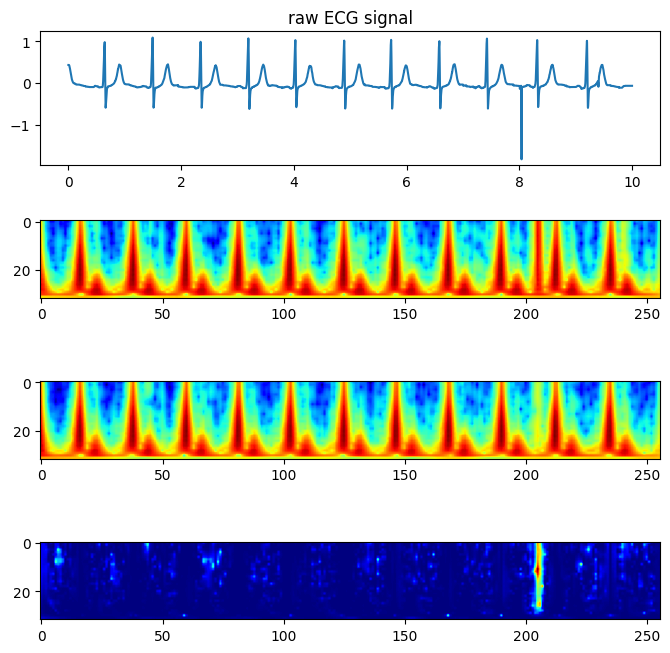

In [18]:
plt.figure(figsize=(8, 8))

plt.subplot(4, 1, 1)
plt.title("raw ECG signal")
t_signal = np.linspace(0, 10, len(ecg))
plt.plot(t_signal, ecg)

plt.subplot(4, 1, 2)
original_image = np.squeeze(output.original_image)
plt.imshow(original_image, cmap='jet')

plt.subplot(4, 1, 3)
cleaned_image = np.squeeze(output.cleaned_image)
plt.imshow(cleaned_image, cmap='jet')

plt.subplot(4, 1, 4)
mse = (original_image - cleaned_image) ** 2
plt.imshow(mse, cmap='jet')